### General topics in email classification and extraction:
1. Again 30+ languages
2. Diff between Categorization and classification
3. Features to use
4. Different approaches
5. Input segmentation (find the 'real' content esp. in emails
6. email formats: txt, eml, msg
7. Extraction of information, general and specific ones
8. Start loving language problems 😊

<b>Categorization</b> is the process of dividing the world into groups of entities whose members are in some way similar to each other.

<b>Classiﬁcation</b> as a process involves the orderly and systematic assignment of each entity to one and only one class within a system of mutually exclusive and nonoverlapping classes.

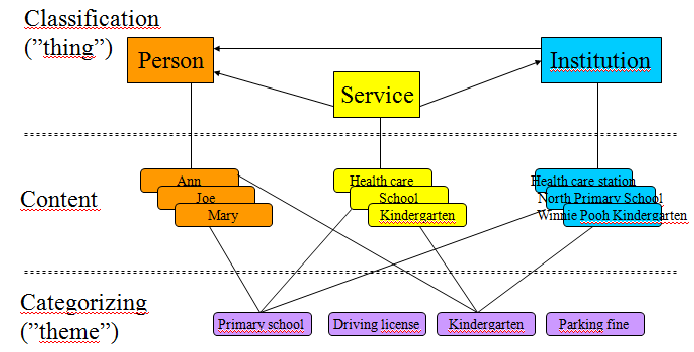

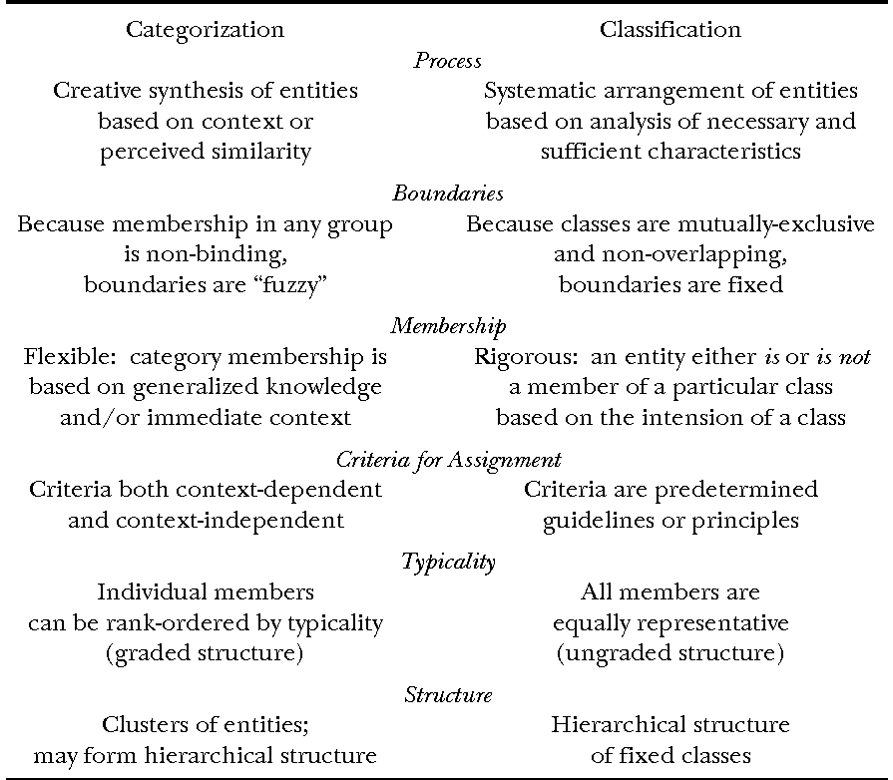
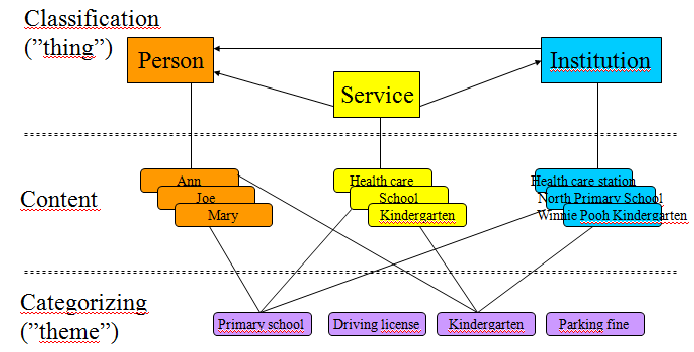

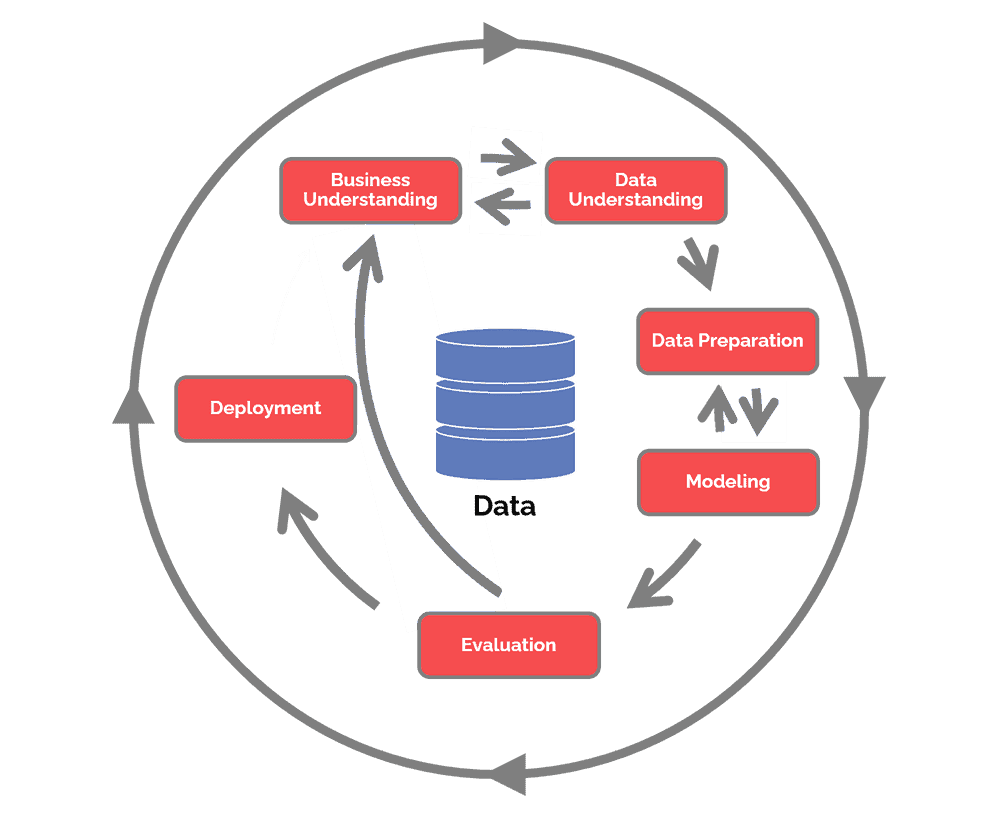

Categories for consideration:
1) Rechnungen 
2) Mahnungen 
3) Vertraege und Vereinbarun 
4) Storno 
5) Aktivierung Sim 
6) Tarife 

In [36]:
import pandas as pd 

In [37]:
import os 

dir1 = "emails_short_ds"

In [38]:
print(os.listdir(dir1))

['1000_RECHNUNGEN', '1400_MAHNUNGEN', '2100_VERTRAEGE_UND_VEREINBARUN', '2110_STORNO', '2700_AKTIVIERUNG_SIM', '2900_TARIFE']


In [41]:
# create a dictionary containing info about letters od 6 different categories

email_data = {
    'Category':[],
    'Email':[],
    'Content':[]
}

for folder in os.listdir(dir1):

    # print(folder)

    clean_folder = folder.split('_')[1]

    fold = os.path.join(dir1, folder)

    for file in os.listdir(fold):
        # check if it's a folder
        file_item = os.path.join(fold, file)
        if os.path.isdir(file_item):
            for f in os.listdir(file_item):
                if f.endswith('.TXT'):
                    # print(str(f))

                    cont = os.path.join(file_item, f)
                    with open(cont, 'r') as f:
                        cont = f.read()
                        # print(cont)

                    email_data['Category'].append(clean_folder)
                    email_data['Email'].append(str(f))
                    email_data['Content'].append(cont)

        # check if it's a single .txt email
        if file.endswith('.TXT'):
            cont = os.path.join(fold, file)
            with open(cont, 'r') as f:
                cont = f.read()
        
                email_data['Category'].append(clean_folder)
                email_data['Email'].append(str(f))
                email_data['Content'].append(cont)
                
            # print(str(file))
            # my_dict[clean_folder].append(file)

In [44]:
for k, v in email_data.items():
    print(k, v[:10], len(v))

Category ['RECHNUNGEN', 'RECHNUNGEN', 'RECHNUNGEN', 'RECHNUNGEN', 'RECHNUNGEN', 'RECHNUNGEN', 'RECHNUNGEN', 'RECHNUNGEN', 'RECHNUNGEN', 'RECHNUNGEN'] 365
Email ["<_io.TextIOWrapper name='emails_short_ds\\\\1000_RECHNUNGEN\\\\101_ERSTRECHNUNGSANFRAGE\\\\ABL10.TXT' mode='r' encoding='cp1251'>", "<_io.TextIOWrapper name='emails_short_ds\\\\1000_RECHNUNGEN\\\\101_ERSTRECHNUNGSANFRAGE\\\\ABL101.TXT' mode='r' encoding='cp1251'>", "<_io.TextIOWrapper name='emails_short_ds\\\\1000_RECHNUNGEN\\\\101_ERSTRECHNUNGSANFRAGE\\\\ABL125.TXT' mode='r' encoding='cp1251'>", "<_io.TextIOWrapper name='emails_short_ds\\\\1000_RECHNUNGEN\\\\101_ERSTRECHNUNGSANFRAGE\\\\ABL15.TXT' mode='r' encoding='cp1251'>", "<_io.TextIOWrapper name='emails_short_ds\\\\1000_RECHNUNGEN\\\\101_ERSTRECHNUNGSANFRAGE\\\\ABL16.TXT' mode='r' encoding='cp1251'>", "<_io.TextIOWrapper name='emails_short_ds\\\\1000_RECHNUNGEN\\\\101_ERSTRECHNUNGSANFRAGE\\\\ABL17.TXT' mode='r' encoding='cp1251'>", "<_io.TextIOWrapper name='emails_short_

In [45]:
df = pd.DataFrame(email_data)

In [46]:
df

,Category,Email,Content
0,RECHNUNGEN,<_io.TextIOWrapper name='emails_short_ds\\1000...,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t2...
1,RECHNUNGEN,<_io.TextIOWrapper name='emails_short_ds\\1000...,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t3...
2,RECHNUNGEN,<_io.TextIOWrapper name='emails_short_ds\\1000...,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t2...
3,RECHNUNGEN,<_io.TextIOWrapper name='emails_short_ds\\1000...,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t2...
4,RECHNUNGEN,<_io.TextIOWrapper name='emails_short_ds\\1000...,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t0...
...,...,...,...
360,TARIFE,<_io.TextIOWrapper name='emails_short_ds\\2900...,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t0...
361,TARIFE,<_io.TextIOWrapper name='emails_short_ds\\2900...,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t2...
362,TARIFE,<_io.TextIOWrapper name='emails_short_ds\\2900...,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t3...
363,TARIFE,<_io.TextIOWrapper name='emails_short_ds\\2900...,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t0...


In [127]:
df.Content[0]

'An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t20.11.2001 08:50:58\nBetreff:\tE-Mail Beantwortung\n\n\t  \n\n\n\nAnrede         : Frau\nName           : Gabriele John\nHandyrufnummer : 49 163 2107575\nAccount Nummer :\nHandymodell    : 6210\nProvider       : E-Plus Service\nEmail          : Gabriele.John@med.uni-duesseldorf.de\n-------------------------------------\nNachricht      : Meine Kd.-Nr. lautet: 4630165\nLogin: Sahra\nHabe auf meinem Handy das Service-PaЯwort PJoZRVfD ьbermittelt bekommen, \nein Portalzugang ist weder mit Service-PaЯwort noch mit dem selbst \ngewдhlten PaЯwort mцglich.\nIch habe eine Frage zur Rechniung  vom 31.10.01, Re.-Nr. 4062664345:\nWie ist es mцglich, daЯ Gebьhren fьr Anrufe zur Cost Control entstehen \nbzw. von E-Plus in andere inlдndische Netze, die am 1. bzw. 2.10 gefьhrt \nwerden, wo noch die vollen Freieinheiten verfьgbar sein mьЯten?\nBitte sorgen Sie dafьr, daЯ ein Portalzugang mцglich ist.\nMfG\n\nGabriele John\n----------------------------------

In [128]:
print(df.Content[0])

An:	KUNDENSERVICE@EPLUS
Kopie:	 
Datum:	20.11.2001 08:50:58
Betreff:	E-Mail Beantwortung

	  



Anrede         : Frau
Name           : Gabriele John
Handyrufnummer : 49 163 2107575
Account Nummer :
Handymodell    : 6210
Provider       : E-Plus Service
Email          : Gabriele.John@med.uni-duesseldorf.de
-------------------------------------
Nachricht      : Meine Kd.-Nr. lautet: 4630165
Login: Sahra
Habe auf meinem Handy das Service-PaЯwort PJoZRVfD ьbermittelt bekommen, 
ein Portalzugang ist weder mit Service-PaЯwort noch mit dem selbst 
gewдhlten PaЯwort mцglich.
Ich habe eine Frage zur Rechniung  vom 31.10.01, Re.-Nr. 4062664345:
Wie ist es mцglich, daЯ Gebьhren fьr Anrufe zur Cost Control entstehen 
bzw. von E-Plus in andere inlдndische Netze, die am 1. bzw. 2.10 gefьhrt 
werden, wo noch die vollen Freieinheiten verfьgbar sein mьЯten?
Bitte sorgen Sie dafьr, daЯ ein Portalzugang mцglich ist.
MfG

Gabriele John
-------------------------------------
--443662760.1006242658021.JavaMa

In [51]:
shuffled_df = df.sample(frac=1)

In [52]:
shuffled_df.head()

,Category,Email,Content
68,MAHNUNGEN,<_io.TextIOWrapper name='emails_short_ds\\1400...,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t2...
23,RECHNUNGEN,<_io.TextIOWrapper name='emails_short_ds\\1000...,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t2...
184,AKTIVIERUNG,<_io.TextIOWrapper name='emails_short_ds\\2700...,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t0...
135,VERTRAEGE,<_io.TextIOWrapper name='emails_short_ds\\2100...,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t1...
349,TARIFE,<_io.TextIOWrapper name='emails_short_ds\\2900...,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t2...


In [72]:
shuffled_df.isna().any()

Category      False
Email         False
Content       False
Email_body    False
dtype: bool

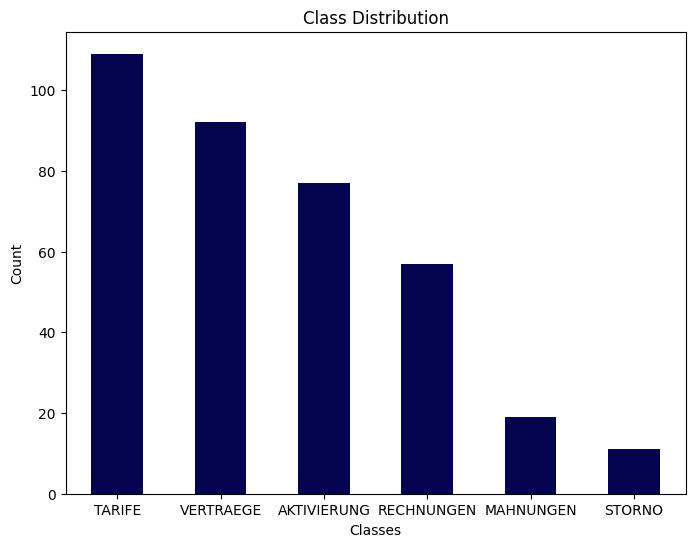

In [48]:
import matplotlib.pyplot as plt 

# Count the occurrences of each class
class_counts = df['Category'].value_counts()

# Plotting the class distribution
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=(0.01,0.01,0.31))
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

In [53]:
print(df['Content'][0])

An:	KUNDENSERVICE@EPLUS
Kopie:	 
Datum:	20.11.2001 08:50:58
Betreff:	E-Mail Beantwortung

	  



Anrede         : Frau
Name           : Gabriele John
Handyrufnummer : 49 163 2107575
Account Nummer :
Handymodell    : 6210
Provider       : E-Plus Service
Email          : Gabriele.John@med.uni-duesseldorf.de
-------------------------------------
Nachricht      : Meine Kd.-Nr. lautet: 4630165
Login: Sahra
Habe auf meinem Handy das Service-PaЯwort PJoZRVfD ьbermittelt bekommen, 
ein Portalzugang ist weder mit Service-PaЯwort noch mit dem selbst 
gewдhlten PaЯwort mцglich.
Ich habe eine Frage zur Rechniung  vom 31.10.01, Re.-Nr. 4062664345:
Wie ist es mцglich, daЯ Gebьhren fьr Anrufe zur Cost Control entstehen 
bzw. von E-Plus in andere inlдndische Netze, die am 1. bzw. 2.10 gefьhrt 
werden, wo noch die vollen Freieinheiten verfьgbar sein mьЯten?
Bitte sorgen Sie dafьr, daЯ ein Portalzugang mцglich ist.
MfG

Gabriele John
-------------------------------------
--443662760.1006242658021.JavaMa

In [54]:
def fetch_body(text):

    my_text = text.split('Nachricht      : ')[-1]

    return my_text.split('--')[0]

shuffled_df['Email_body'] = shuffled_df['Content'].apply(fetch_body)

In [61]:
sentence_example = shuffled_df['Email_body'][88]
print(sentence_example)

Sehr geehrte Damen und Herren,

wie mir von Ihrer 1000er Hotline mitgeteilt wurde
lдsst sich mein Vertrag fьr ein Jahr kostenlos bzw.
kostengьnstig nicht stillegen.

Da ich mich ab November 2001 fьr ein Jahr in den USA
aufhalten werde und ePlus dort definitiv nicht funktioniert,
mцchte ich ьber dieses Jahr nicht monatlich 19,95 DM
fьr keine entegegengenommene Leistung bezahlen.

Bitte teilen Sie mir mit ob es keine gьnstigere Alternative
gibt den Vertrag Aufrecht zu erhalten, ggf. mit einer vorzeitigen
Vertragsverlдngerung.

Falls diese Mцglichkeit nicht besteht mцchte ich den laufenden
Vertrag zum nдchst mцglichen Zeitpunkt kьndigen.

Ich hoffe auf eine beidseitige Einigung, da ich mit ePlus
als Produkt und auch mit der Serviceleistung ьberaus zufrieden bin.

Vielen Dank im Voraus,

mit freundlichen Grьssen

Sebastian Steuber



### Functions for text cleaning

In [62]:
from cleantext import clean 

sent = clean(sentence_example,
    fix_unicode=True,
    to_ascii=True,
    lower=True,
    no_line_breaks=True,
    no_urls=True,
    no_emails=True,
    no_phone_numbers=True,
    no_numbers=True,
    no_digits=True,
    no_punct=True,
    no_currency_symbols=True,
    replace_with_punct="",          # instead of removing punctuations you may replace them
    replace_with_url="",
    replace_with_email="",
    replace_with_phone_number="",
    replace_with_number="",
    replace_with_digit="",
    replace_with_currency_symbol="",
    lang="de"     
    )

In [65]:
sentence_example

'Sehr geehrte Damen und Herren,\n\nwie mir von Ihrer 1000er Hotline mitgeteilt wurde\nlдsst sich mein Vertrag fьr ein Jahr kostenlos bzw.\nkostengьnstig nicht stillegen.\n\nDa ich mich ab November 2001 fьr ein Jahr in den USA\naufhalten werde und ePlus dort definitiv nicht funktioniert,\nmцchte ich ьber dieses Jahr nicht monatlich 19,95 DM\nfьr keine entegegengenommene Leistung bezahlen.\n\nBitte teilen Sie mir mit ob es keine gьnstigere Alternative\ngibt den Vertrag Aufrecht zu erhalten, ggf. mit einer vorzeitigen\nVertragsverlдngerung.\n\nFalls diese Mцglichkeit nicht besteht mцchte ich den laufenden\nVertrag zum nдchst mцglichen Zeitpunkt kьndigen.\n\nIch hoffe auf eine beidseitige Einigung, da ich mit ePlus\nals Produkt und auch mit der Serviceleistung ьberaus zufrieden bin.\n\nVielen Dank im Voraus,\n\nmit freundlichen Grьssen\n\nSebastian Steuber\n'

In [64]:
print(sent)

sehr geehrte damen und herren wie mir von ihrer er hotline mitgeteilt wurde lsst sich mein vertrag fr ein jahr kostenlos bzw kostengnstig nicht stillegen da ich mich ab november fr ein jahr in den usa aufhalten werde und eplus dort definitiv nicht funktioniert mchte ich ber dieses jahr nicht monatlich dm fr keine entegegengenommene leistung bezahlen bitte teilen sie mir mit ob es keine gnstigere alternative gibt den vertrag aufrecht zu erhalten ggf mit einer vorzeitigen vertragsverlngerung falls diese mglichkeit nicht besteht mchte ich den laufenden vertrag zum nchst mglichen zeitpunkt kndigen ich hoffe auf eine beidseitige einigung da ich mit eplus als produkt und auch mit der serviceleistung beraus zufrieden bin vielen dank im voraus mit freundlichen grssen sebastian steuber


In [92]:
import spacy

de_nlp = spacy.load("de_core_news_sm")

def clean_text(text):

    cleaned_text = clean(text)

    doc = de_nlp(cleaned_text)

    # lemmatize filtered non-stopwords
    no_stopwords_sent = [str(word.lemma_).lower() for word in doc if not word.is_stop]

    return ' '.join(no_stopwords_sent)

clean_text(sent)


'geehrt dam herr hotlinen mitteilen lssen vertrag fr kostenlos bzw kostengnstig stillegen november fr usa aufhalten eplus definitiv funktionieren mchn ber monatlich dm fr entegegengenommen leistung bezahlen bitte teilen gnstiger alternative vertrag aufrecht erhalten ggf vorzeitig vertragsverlngerung falls mglichkeit bestehen mchn laufend vertrag nchst mglich zeitpunkt kndigen hoffen beidseitig einigung eplus produkt serviceleistung beraus zufrieden voraus freundlich grsse sebastian steuber'

In [69]:
sent

'sehr geehrte damen und herren wie mir von ihrer er hotline mitgeteilt wurde lsst sich mein vertrag fr ein jahr kostenlos bzw kostengnstig nicht stillegen da ich mich ab november fr ein jahr in den usa aufhalten werde und eplus dort definitiv nicht funktioniert mchte ich ber dieses jahr nicht monatlich dm fr keine entegegengenommene leistung bezahlen bitte teilen sie mir mit ob es keine gnstigere alternative gibt den vertrag aufrecht zu erhalten ggf mit einer vorzeitigen vertragsverlngerung falls diese mglichkeit nicht besteht mchte ich den laufenden vertrag zum nchst mglichen zeitpunkt kndigen ich hoffe auf eine beidseitige einigung da ich mit eplus als produkt und auch mit der serviceleistung beraus zufrieden bin vielen dank im voraus mit freundlichen grssen sebastian steuber'

In [93]:
shuffled_df['Clean_text'] = shuffled_df['Email_body'].apply(clean_text)

In [111]:
import re 

def no_dashes(text):
    return re.sub('--', '', text.replace('\n', ''))

shuffled_df['Clean_text'] = shuffled_df['Clean_text'].apply(no_dashes)

In [114]:
shuffled_df.tail()

,Category,Email,Content,Email_body,Category_ID,Clean_text
97,VERTRAEGE,<_io.TextIOWrapper name='emails_short_ds\\2100...,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t0...,Sehr geehrte Damen und Herren.\nIch bin derzei...,5,geehrt dam herr derzeit t-d1-kund ablauf ve...
240,AKTIVIERUNG,<_io.TextIOWrapper name='emails_short_ds\\2700...,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t0...,"sehr geehrte Damen und Herren,\n\nIch habe m...",0,geehrt dam herr handy ausgesperrt bentigen p...
192,AKTIVIERUNG,<_io.TextIOWrapper name='emails_short_ds\\2700...,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t1...,was kann ich tun??? Mir wurde heute mein Telef...,0,telefon stehlen
227,AKTIVIERUNG,<_io.TextIOWrapper name='emails_short_ds\\2700...,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t0...,"Sehr geehrte Damen und Herren,\n\nich habe ges...",0,geehrt dam herr gestern e-plus mobilfunkvert...
67,MAHNUNGEN,<_io.TextIOWrapper name='emails_short_ds\\1400...,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t0...,"Sehr geehrte Damen und Herren, meine E Plus Ru...",1,geehrt dam herr e plus rufnummer ausstehend ...


### Define the classifier 

In [115]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

shuffled_df['Category_ID'] = label_encoder.fit_transform(shuffled_df['Category'])

In [116]:
shuffled_df

,Category,Email,Content,Email_body,Category_ID,Clean_text
68,MAHNUNGEN,<_io.TextIOWrapper name='emails_short_ds\\1400...,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t2...,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t2...,1,kundenservice@eplus kopie datum 25.07.2001...
23,RECHNUNGEN,<_io.TextIOWrapper name='emails_short_ds\\1000...,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t2...,"Sehr geehrte Damen und Herren,\n\nnachdem ich ...",2,geehrt dam herr abrechnung fr september 2001...
184,AKTIVIERUNG,<_io.TextIOWrapper name='emails_short_ds\\2700...,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t0...,"Sehr geehrte Herren,\nich habe gestern mit Ihr...",0,geehrt herr gestern hotline telefoniern kar...
135,VERTRAEGE,<_io.TextIOWrapper name='emails_short_ds\\2100...,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t1...,Hallo EPlus\n\n\nSie haben mir gerade freundli...,5,hallo eplus freundlicherweise second line fre...
349,TARIFE,<_io.TextIOWrapper name='emails_short_ds\\2900...,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t2...,Was kostet ein Telefonat aus dem E-Plus Netz i...,4,kosten telefonat e-plus netz usa usa festnet...
...,...,...,...,...,...,...
97,VERTRAEGE,<_io.TextIOWrapper name='emails_short_ds\\2100...,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t0...,Sehr geehrte Damen und Herren.\nIch bin derzei...,5,geehrt dam herr derzeit t-d1-kund ablauf ve...
240,AKTIVIERUNG,<_io.TextIOWrapper name='emails_short_ds\\2700...,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t0...,"sehr geehrte Damen und Herren,\n\nIch habe m...",0,geehrt dam herr handy ausgesperrt bentigen p...
192,AKTIVIERUNG,<_io.TextIOWrapper name='emails_short_ds\\2700...,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t1...,was kann ich tun??? Mir wurde heute mein Telef...,0,telefon stehlen
227,AKTIVIERUNG,<_io.TextIOWrapper name='emails_short_ds\\2700...,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t0...,"Sehr geehrte Damen und Herren,\n\nich habe ges...",0,geehrt dam herr gestern e-plus mobilfunkvert...


In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings

warnings.filterwarnings("ignore")

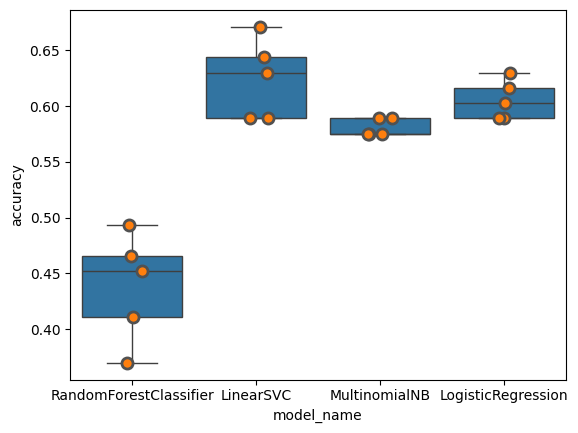

In [120]:
warnings.filterwarnings("ignore")

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2))
features = tfidf.fit_transform(shuffled_df.Clean_text).toarray()
labels = shuffled_df.Category

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))

cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [125]:
categories_list = list(shuffled_df['Category'].unique())

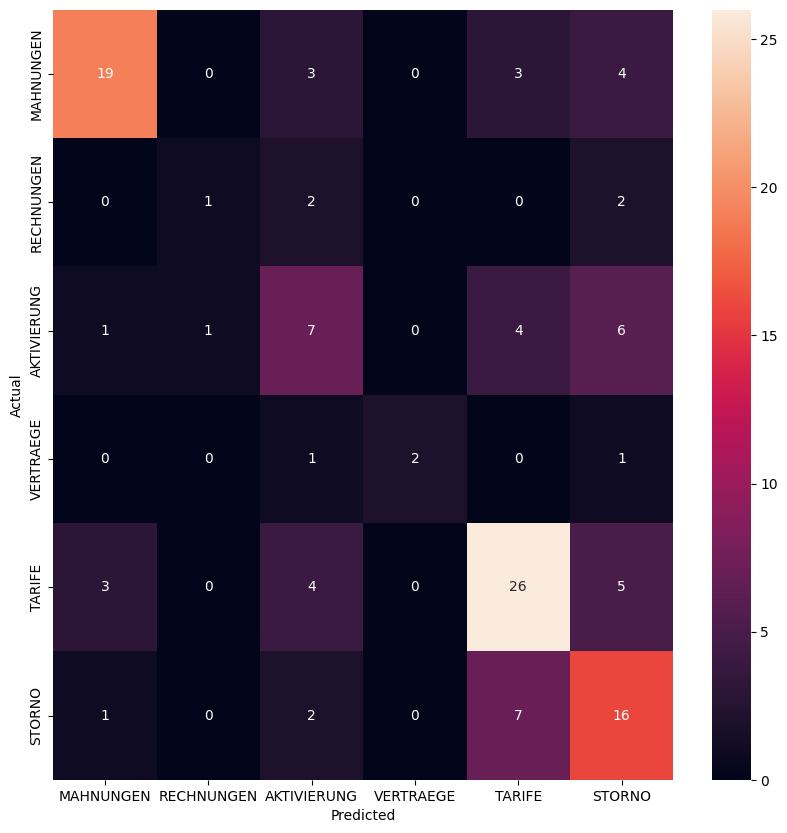

In [122]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, shuffled_df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=categories_list, yticklabels=categories_list)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [123]:
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred, target_names=shuffled_df['Category'].unique()))

              precision    recall  f1-score   support

   MAHNUNGEN       0.79      0.66      0.72        29
  RECHNUNGEN       0.50      0.20      0.29         5
 AKTIVIERUNG       0.37      0.37      0.37        19
   VERTRAEGE       1.00      0.50      0.67         4
      TARIFE       0.65      0.68      0.67        38
      STORNO       0.47      0.62      0.53        26

    accuracy                           0.59       121
   macro avg       0.63      0.50      0.54       121
weighted avg       0.61      0.59      0.59       121



In [126]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.624658
LogisticRegression        0.605479
MultinomialNB             0.580822
RandomForestClassifier    0.438356
Name: accuracy, dtype: float64

Compare with the performance of the model trained on the unpreprocessed text:

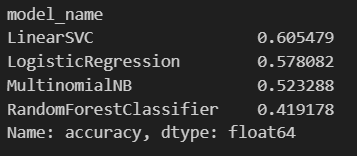

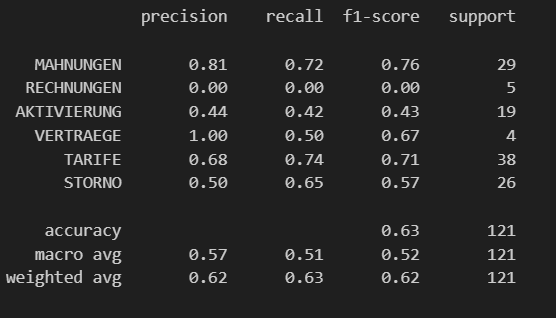

<b>Issues:</b>
1) Imbalanced dataset 
2) Encoding problems:<br>
<em>vielen Dank fьr Ihre schnelle Antwort!!!</em> (must be <em>für</em>)
3) Cleaning method 
4) Small dataset